# Dataset

In [10]:
import pandas as pd

In [11]:
# Lista de URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_1.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_2.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_3.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_4.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_5.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_6.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_7.csv",
    "https://raw.githubusercontent.com/JoseChirif/NPL-project/main/data/parte_8.csv",
]

In [12]:
# Encabezados del dataset
columnas = ["polarity", "id", "date", "query", "user", "text"]

# Leer los archivos CSV sin encabezados y asignar los nombres de columnas
dataframes = [pd.read_csv(url, header=None, names=columnas) for url in urls]

# Combinar todos los DataFrames en uno solo
dataset = pd.concat(dataframes, ignore_index=True)

# Visualizar el resultado
print(f"Dataset combinado tiene {dataset.shape[0]} filas y {dataset.shape[1]} columnas.")
dataset.head()

Dataset combinado tiene 1600007 filas y 6 columnas.


,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
dataset['polarity'].value_counts()

,count
polarity,
0,800007
4,800000


In [14]:
# Filtrar solo las columnas relevantes (polarity y text)
dataset = dataset[['polarity', 'text']]

# Convertir las etiquetas de polaridad para que sean más legibles
dataset['polarity'] = dataset['polarity'].map({0: 'negativo', 2: 'neutro', 4: 'positivo'})

print("dataset columnas relevantes")
dataset.head()

dataset columnas relevantes


<ipython-input-14-c5840f4ec34c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['polarity'] = dataset['polarity'].map({0: 'negativo', 2: 'neutro', 4: 'positivo'})


,polarity,text
0,negativo,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negativo,is upset that he can't update his Facebook by ...
2,negativo,@Kenichan I dived many times for the ball. Man...
3,negativo,my whole body feels itchy and like its on fire
4,negativo,"@nationwideclass no, it's not behaving at all...."


In [15]:
import re

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto, flags=re.MULTILINE)  # Eliminar URLs
    texto = re.sub(r'\@\w+|\#', '', texto)  # Eliminar menciones y hashtags
    texto = texto.strip()  # Quitar espacios en los extremos
    return texto

# Aplicar la función de limpieza
dataset['text'] = dataset['text'].apply(limpiar_texto)
dataset.head()


,polarity,text
0,negativo,- A that's a bummer. You shoulda got David Ca...
1,negativo,is upset that he can't update his Facebook by ...
2,negativo,I dived many times for the ball. Managed to sa...
3,negativo,my whole body feels itchy and like its on fire
4,negativo,"no, it's not behaving at all. i'm mad. why am ..."


In [16]:
dataset.head(100)

,polarity,text
0,negativo,- A that's a bummer. You shoulda got David Ca...
1,negativo,is upset that he can't update his Facebook by ...
2,negativo,I dived many times for the ball. Managed to sa...
3,negativo,my whole body feels itchy and like its on fire
4,negativo,"no, it's not behaving at all. i'm mad. why am ..."
...,...,...
95,negativo,Strider is a sick little puppy
96,negativo,"so rylee,grace...wana go steve's party or not?..."
97,negativo,"hey, I actually won one of my bracket pools! T..."
98,negativo,"YOU don't follow me, either and i work for you!"


In [17]:
dataset['polarity'].value_counts()

,count
polarity,
negativo,800007
positivo,800000


# NPL project

Epoch 1/5
40001/40001 ━━━━━━━━━━━━━━━━━━━━ 1512s 38ms/step - accuracy: 0.9999 - loss: 8.9242e-04 - val_accuracy: 1.0000 - val_loss: 1.8420e-16
Epoch 2/5
40001/40001 ━━━━━━━━━━━━━━━━━━━━ 1570s 39ms/step - accuracy: 1.0000 - loss: 2.5562e-11 - val_accuracy: 1.0000 - val_loss: 2.6574e-17
Epoch 3/5
40001/40001 ━━━━━━━━━━━━━━━━━━━━ 1531s 38ms/step - accuracy: 1.0000 - loss: 1.6560e-11 - val_accuracy: 1.0000 - val_loss: 7.1822e-18
Epoch 4/5
40001/40001 ━━━━━━━━━━━━━━━━━━━━ 1541s 38ms/step - accuracy: 1.0000 - loss: 7.7405e-12 - val_accuracy: 1.0000 - val_loss: 3.5615e-18
Epoch 5/5
40001/40001 ━━━━━━━━━━━━━━━━━━━━ 1580s 38ms/step - accuracy: 1.0000 - loss: 8.7720e-12 - val_accuracy: 1.0000 - val_loss: 1.8334e-18
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 1.0000 - loss: 1.8346e-18
Accuracy: 1.00
Loss: 0.00


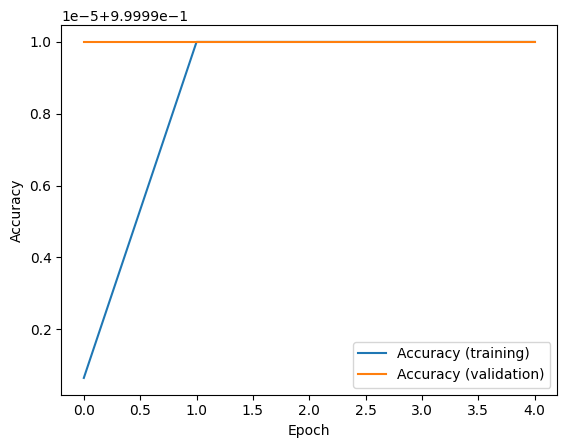

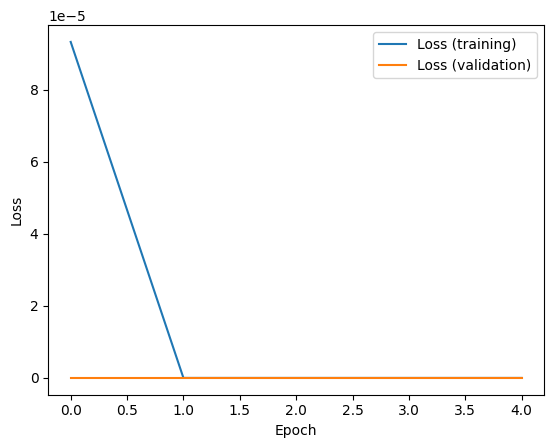

In [18]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# Reducir el DataFrame a las columnas 'polarity' y 'text'
dataset = dataset[['polarity', 'text']]

# Convertir 'polarity' a 0 y 1 (si no está ya en ese formato)
dataset['polarity'] = dataset['polarity'].apply(lambda x: 1 if x == 4 else 0)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    dataset['text'], dataset['polarity'], test_size=0.2, random_state=42
)

# Convertir texto y etiquetas a tensores
X_train = tf.convert_to_tensor(X_train, dtype=tf.string)
X_test = tf.convert_to_tensor(X_test, dtype=tf.string)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Crear un TextVectorization para procesar el texto
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=100)
vectorizer.adapt(X_train)

# Construir el modelo de clasificación
model = Sequential([
    vectorizer,  # Capa para convertir texto en secuencias de enteros
    Embedding(input_dim=20000, output_dim=128),  # Capa de embedding
    GlobalAveragePooling1D(),  # Reducción global
    Dropout(0.5),  # Regularización
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Loss: {loss:.2f}")

# Mostrar los resultados del entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy (training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
